In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt




In [2]:
df = pd.read_csv('Datasets.csv')

In [3]:
print(df.head())
print(df.info())
print(df.describe())


   Unnamed: 0  step      type     branch    amount     nameOrig  \
0           0     1   PAYMENT  Indonesia   9839.64  C1231006815   
1           1     1   PAYMENT      India   1864.28  C1666544295   
2           2     1  TRANSFER      India    181.00  C1305486145   
3           3     1  CASH_OUT  Australia    181.00   C840083671   
4           4     1   PAYMENT  Australia  11668.14  C2048537720   

   oldbalanceOrg  newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  \
0       170136.0       160296.36  M1979787155             0.0             0.0   
1        21249.0        19384.72  M2044282225             0.0             0.0   
2          181.0            0.00   C553264065             0.0             0.0   
3          181.0            0.00    C38997010         21182.0             0.0   
4        41554.0        29885.86  M1230701703             0.0             0.0   

   unusuallogin  isFlaggedFraud Acct type Date of transaction Time of day  \
0             9               0  

In [4]:
# Check for missing values
print(df.isnull().sum())

# If there are missing values, you can fill them or drop the rows
df = df.dropna()  # Here, we drop rows with missing values



Unnamed: 0              0
step                    0
type                    4
branch                  0
amount                  2
nameOrig                6
oldbalanceOrg           2
newbalanceOrig          0
nameDest                6
oldbalanceDest          1
newbalanceDest          2
unusuallogin            0
isFlaggedFraud          0
Acct type              10
Date of transaction     7
Time of day             2
isFraud                 2
dtype: int64


In [5]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns to encode
categorical_cols = ['type', 'branch', 'Acct type', 'Time of day']

# Apply Label Encoding to categorical columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save the encoder for inverse transformation if needed

print(df.head())


   Unnamed: 0  step  type  branch    amount     nameOrig  oldbalanceOrg  \
0           0     1     3      55   9839.64  C1231006815       170136.0   
1           1     1     3      54   1864.28  C1666544295        21249.0   
2           2     1     4      54    181.00  C1305486145          181.0   
3           3     1     1       7    181.00   C840083671          181.0   
4           4     1     3       7  11668.14  C2048537720        41554.0   

   newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  unusuallogin  \
0       160296.36  M1979787155             0.0             0.0             9   
1        19384.72  M2044282225             0.0             0.0            10   
2            0.00   C553264065             0.0             0.0             2   
3            0.00    C38997010         21182.0             0.0             1   
4        29885.86  M1230701703             0.0             0.0            17   

   isFlaggedFraud  Acct type Date of transaction  Time of day  isFra

In [6]:
from sklearn.preprocessing import StandardScaler

# Define features (X) and target (y)
X = df.drop(columns=['isFraud', 'nameOrig', 'nameDest', 'Date of transaction'])
y = df['isFraud']

# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(X_scaled[:5])


[[-1.73803671 -1.29698612  0.58800906  0.10970202 -0.35111267 -0.33679015
  -0.34392703 -0.34858628 -0.36380185 -0.26082981  0.         -1.49547494
   0.0403231 ]
 [-1.73769398 -1.29698612  0.58800906  0.07975792 -0.38054194 -0.40676495
  -0.40876287 -0.34858628 -0.36380185 -0.0886951   0.          0.66868389
   0.0403231 ]
 [-1.73735125 -1.29698612  1.33745131  0.07975792 -0.38675328 -0.41666662
  -0.41768211 -0.34858628 -0.36380185 -1.46577274  0.         -1.49547494
   0.0403231 ]
 [-1.73700852 -1.29698612 -0.91087544 -1.32761463 -0.38675328 -0.41666662
  -0.41768211 -0.34068509 -0.36380185 -1.63790744  0.         -1.49547494
  -1.1703299 ]
 [-1.73666579 -1.29698612  0.58800906 -1.32761463 -0.34436546 -0.39722189
  -0.40393111 -0.34858628 -0.36380185  1.11624783  0.         -1.49547494
   0.0403231 ]]


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (8070, 13)
Testing set size: (2018, 13)


In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [10]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=32)


Epoch 1/10
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9933 - loss: 0.1588 - val_accuracy: 0.9950 - val_loss: 0.0349
Epoch 2/10
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9924 - loss: 0.0462 - val_accuracy: 0.9950 - val_loss: 0.0313
Epoch 3/10
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9928 - loss: 0.0385 - val_accuracy: 0.9950 - val_loss: 0.0305
Epoch 4/10
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9944 - loss: 0.0322 - val_accuracy: 0.9950 - val_loss: 0.0309
Epoch 5/10
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9933 - loss: 0.0359 - val_accuracy: 0.9950 - val_loss: 0.0292
Epoch 6/10
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9922 - loss: 0.0383 - val_accuracy: 0.9950 - val_loss: 0.0287
Epoch 7/10
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9935 - loss: 0.0330 - val_accuracy: 0.9957 - val_loss: 0.0284
Epoch 8/10
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9942 - loss: 0.0308 - val_accuracy: 0.

Confusion Matrix:
[[2005    0]
 [  13    0]]
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
ROC-AUC Score: 0.653213121043545


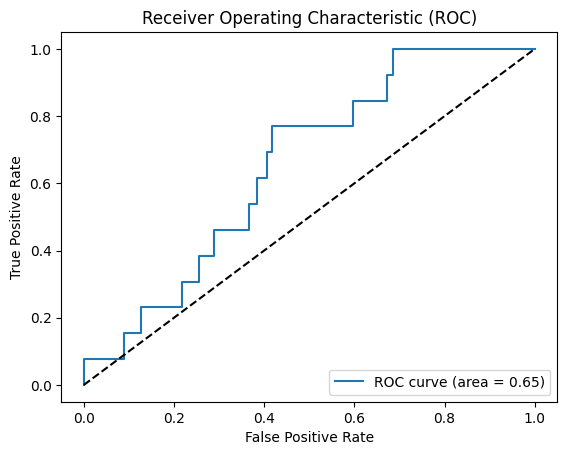

In [13]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_mlp)
print("Confusion Matrix:")
print(conf_matrix)

# ROC-AUC
y_pred_mlp_proba = model.predict(X_test).flatten()
roc_auc = roc_auc_score(y_test, y_pred_mlp_proba)
print("ROC-AUC Score:", roc_auc)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_mlp_proba)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [14]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)


SVC(kernel='linear', probability=True)

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Hybrid Model Accuracy: 0.9935579781962339
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      2005
         1.0       0.00      0.00      0.00        13

    accuracy                           0.99      2018
   macro avg       0.50      0.50      0.50      2018
weighted avg       0.99      0.99      0.99      2018

Confusion Matrix:
[[2005    0]
 [  13    0]]
Hybrid ROC-AUC Score: 0.7404565509303664


c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


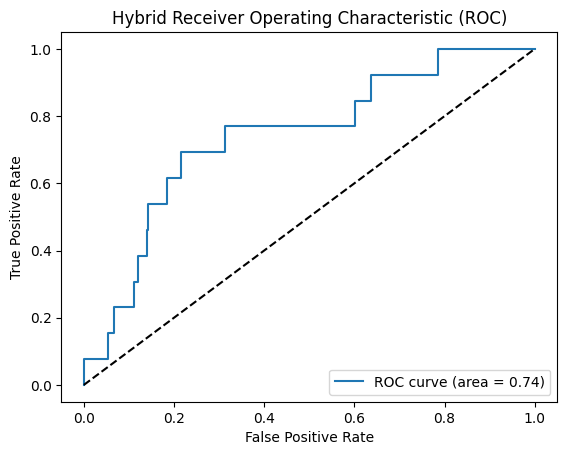

In [17]:
# Combine Predictions
y_pred_mlp_proba = model.predict(X_test).flatten()
y_pred_svm_proba = svm_model.predict_proba(X_test)[:, 1]

combined_proba = (y_pred_mlp_proba + y_pred_svm_proba) / 2
y_pred_combined = (combined_proba > 0.5).astype(int)

# Evaluate the Hybrid Model
print("Hybrid Model Accuracy:", accuracy_score(y_test, y_pred_combined))
print(classification_report(y_test, y_pred_combined))

# Confusion Matrix for Hybrid Model
conf_matrix_combined = confusion_matrix(y_test, y_pred_combined)
print("Confusion Matrix:")
print(conf_matrix_combined)

# ROC-AUC for Hybrid Model
roc_auc_combined = roc_auc_score(y_test, combined_proba)
print("Hybrid ROC-AUC Score:", roc_auc_combined)

fpr_combined, tpr_combined, thresholds_combined = roc_curve(y_test, combined_proba)
plt.figure()
plt.plot(fpr_combined, tpr_combined, label=f"ROC curve (area = {roc_auc_combined:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Hybrid Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [18]:
y_pred_mlp_proba = model.predict(X_test).flatten()
y_pred_svm_proba = svm_model.predict_proba(X_test)[:, 1]

combined_proba = (y_pred_mlp_proba + y_pred_svm_proba) / 2
y_pred_combined = (combined_proba > 0.5).astype(int)

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [19]:
print("Hybrid Model Accuracy:", accuracy_score(y_test, y_pred_combined))
print(classification_report(y_test, y_pred_combined))

Hybrid Model Accuracy: 0.9935579781962339
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      2005
         1.0       0.00      0.00      0.00        13

    accuracy                           0.99      2018
   macro avg       0.50      0.50      0.50      2018
weighted avg       0.99      0.99      0.99      2018



c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
